# 第八章-多项式回归与模型泛化

## 8-1 什么是多项式回归

![](picture/8-1-1.png)

![](picture/8-1-2.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(100, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

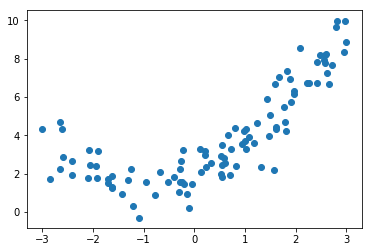

In [5]:
plt.scatter(x, y)
plt.show()

**使用线性回归**

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

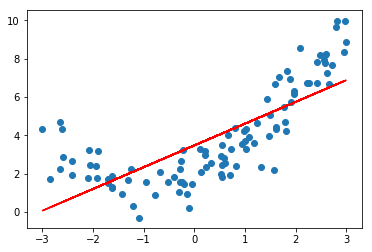

In [9]:
plt.scatter(x, y)
plt.plot(x, y_predict, color="r")
plt.show()

使用线性回归不能很好的拟合样本数据

**解决方案, 添加一个特征**

In [10]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [14]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

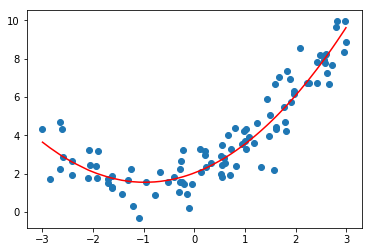

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")
plt.show()

In [18]:
lin_reg2.coef_

array([0.99938322, 0.51233098])

In [19]:
lin_reg2.intercept_

2.04292853122732

## 8-2 `scikit-learn` 中的多项式回归于 `pipeline`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(100, 3)

In [16]:
X[:5, :]

array([[ 1.35532171],
       [ 0.39163791],
       [-2.36469644],
       [-0.79809138],
       [-0.87000521]])

In [17]:
X2[:5, :]

array([[ 1.        ,  1.35532171,  1.83689695],
       [ 1.        ,  0.39163791,  0.15338026],
       [ 1.        , -2.36469644,  5.59178927],
       [ 1.        , -0.79809138,  0.63694985],
       [ 1.        , -0.87000521,  0.75690906]])

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

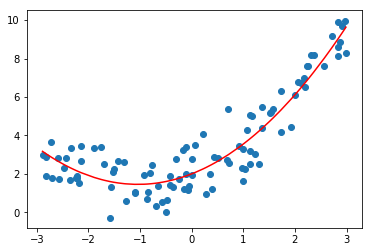

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")
plt.show()

In [21]:
lin_reg2.coef_

array([0.        , 1.04830624, 0.50327085])

In [22]:
lin_reg2.intercept_

2.003180752852513

**关于PolynomialFeatures**

In [23]:
X = np.arange(1, 11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2.shape

(5, 6)

In [27]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

**`Pipline`**

In [42]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)), 
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [44]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

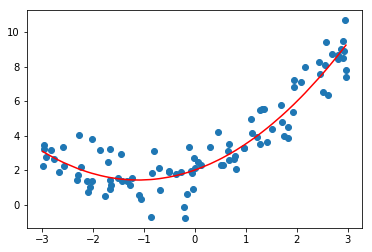

In [45]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()

## 8-3 过拟合与欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(666)
x = np.random.uniform(1, 10, size=100)
y = np.random.normal(-1, 1, size=100)

## 8-4 为什么要训练数据集与测试数据集

## 8-5 学习曲线

## 8-6 验证数据集与交叉验证

## 8-7 偏差方差平衡

## 8-8 模型泛化与岭回归

## 8-9 LASSO

## 8-10 L1,L2和弹性网络